In [79]:
import pylab as pl
import pandas as pd
import numpy as np
#imports downloader
#from getCitiBikeCSV import getCitiBikeCSV
import scipy as sp
%pylab inline

import os
#this makes my plots pretty! but it is totally not mandatory to do it
import json

import scipy.stats

Populating the interactive namespace from numpy and matplotlib


In [66]:
def getCitiBikeCSV(datestring):
    print ("Downloading", datestring)
    ### First I will heck that it is not already there
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            # if in the current dir just move it
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                ###  To move it I use the os.system() functions to run bash commands with arguments
                os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
            ### unzip the csv 
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
            ## NOTE: old csv citibike data had a different name structure. 
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
                os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")
        
print('did anything work')

did anything work


In [67]:
datestring = '201508'
getCitiBikeCSV(datestring)

('Downloading', '201508')
file in place, you can continue


In [68]:
dataframe = pd.read_csv('/home/cusp/cjs676/PUIdata/201508-citibike-tripdata.csv')

In [70]:
dataframe.head(5)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1202,8/1/2015 00:00:04,8/1/2015 00:20:07,168,W 18 St & 6 Ave,40.739713,-73.994564,385,E 55 St & 2 Ave,40.757973,-73.966033,23253,Subscriber,1987.0,1
1,301,8/1/2015 00:00:05,8/1/2015 00:05:06,450,W 49 St & 8 Ave,40.762272,-73.987882,479,9 Ave & W 45 St,40.760193,-73.991255,22675,Subscriber,1951.0,2
2,431,8/1/2015 00:00:06,8/1/2015 00:07:18,312,Allen St & E Houston St,40.722055,-73.989111,296,Division St & Bowery,40.714131,-73.997047,19831,Subscriber,1985.0,1
3,273,8/1/2015 00:00:09,8/1/2015 00:04:43,382,University Pl & E 14 St,40.734927,-73.992005,229,Great Jones St,40.727434,-73.993790,22765,Subscriber,1975.0,1
4,1256,8/1/2015 00:00:17,8/1/2015 00:21:13,352,W 56 St & 6 Ave,40.763406,-73.977225,432,E 7 St & Avenue A,40.726218,-73.983799,22127,Subscriber,1978.0,1


Test whether a gaussian model N($\mu$, $\sigma$) for the age distribution of citibike drivers is a sensible model, or if you can find a better fit with another distribution.

histogram
4 tests total

2 dfferent test for gaussian - 

2 test for another distribution



Use 2 tests: KS, AD, KL, chisq (even though we have not talked about it in detail yet) to do this.

Test at the Normal and a least one other distributions (e.g. Poisson, or Binomial, or Chisq, Lognormal.......)

No skeleton: you are on your own!

Extra credit: Divide your sample geographically: by Borrow + split Manhattan in an Uptown and a Downtown sample (use your discretion to do so, but ZIP code is a good idea) and see if you notice any differences in how the age distribution can be modeled.


GRADING:

Your notebook must:

state the $H_0$ correcty

generate the distributions correctly.

use the test correctly

make conclusions about the rejection of the Null

each plot must have a caption which describes the plot in terms of Central Limit Theorem

H0 = The number of riders will not vary by age significantly
Ha = 

In [71]:
dataframe.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender'],
      dtype='object')

In [72]:
dataframe['age'] = 2016 - dataframe['birth year']

In [73]:
dataframe.drop([ 'tripduration', 'starttime', 'stoptime',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid',
       'usertype', 'gender'], axis=1, inplace=True)

In [74]:
dataframe.head(5)

,start station id,birth year,age
0,168,1987.0,29.0
1,450,1951.0,65.0
2,312,1985.0,31.0
3,382,1975.0,41.0
4,352,1978.0,38.0


In [95]:
df2 = dataframe[['age']]

In [101]:
df2.head(5)

,age
0,29.0
1,65.0
2,31.0
3,41.0
4,38.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8cdab7a210>]], dtype=object)

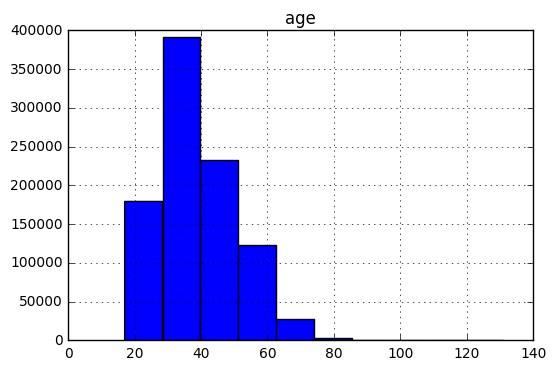

In [96]:
df2.hist()

#scipy.stats.kstest
#2 dfferent test for gaussian - 
#Use 2 tests: KS, AD,

KS = scipy.stats.kstest(rvs, cdf, args=(), N=20, alternative='two_sided', mode='approx', **kwds)

AD  scipy.stats.anderson(x, dist='norm')

In [99]:
dataframe.dropna()
df2 = df2.dropna()

H0: The age distribution of citi bike riders follows a normal or gaussian distribution. 
Ha:	The data do not follow the specified distribution

In [100]:
#KS Test

sp.stats.kstest(df2.age, 'norm')

KstestResult(statistic=1.0, pvalue=0.0)


Since the pvalue is very low (pvalue=0.0) we reject the null hypothesis that the age distribution in normal




In [104]:
sp.stats.anderson(df2.age, dist='norm')

AndersonResult(statistic=16559.991094247671, critical_values=array([ 0.576,  0.656,  0.787,  0.918,  1.092]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))

At the 5% significance level the critical value is .787. THe Anderson Statistic is ~16559  

2 test for another distribution
Use 2 tests: KS, AD

The Anderson-Darling test is defined as:
H0:	The data follow a specified distribution.
Ha:	The data do not follow the specified distribution

In [102]:
sp.stats.kstest(df2.age, 'logistic')

KstestResult(statistic=0.99999995860062441, pvalue=0.0)

H0:	The data follow a specified distribution
Ha:	The data do not follow the specified distribution
Test Statistic:	The Kolmogorov-Smirnov test statistic is 

In [103]:
sp.stats.anderson(df2.age, dist='logistic')

AndersonResult(statistic=nan, critical_values=array([ 0.426,  0.563,  0.66 ,  0.769,  0.906,  1.01 ]), significance_level=array([ 25. ,  10. ,   5. ,   2.5,   1. ,   0.5]))

At the 5% significance level the the critical value is .66

The Anderson-Darling test is defined as:
H0:	The data follow a specified distribution.
Ha:	The data do not follow the specified distribution